# Birth–death process

In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
from tqdm import tqdm

### Initial values

In [2]:
n = 5

In [3]:
state_matrix = np.zeros((n,n))
left = np.zeros(n)
right = np.zeros(n)
for i in range(n-1):
    #left[i] = random.random()
    #right[i] = random.random()
    left[i] = random.randint(1, 100)
    right[i] = random.randint(1, 100)
#right = np.array([3.75,2.5,1.65,5.65])
#left = np.array([4.2,5.45,3.3,2.85])
upper_diagonal = np.diagonal(state_matrix,offset=1)
bottom_diagonal = np.diagonal(state_matrix,offset=-1)
upper_diagonal.setflags(write = True)
bottom_diagonal.setflags(write = True)
for i in range(n-1):
    upper_diagonal[i]=right[i]
    bottom_diagonal[i]=left[i]

In [4]:
state_matrix

array([[ 0., 46.,  0.,  0.,  0.],
       [24.,  0., 32.,  0.,  0.],
       [ 0., 97.,  0., 33.,  0.],
       [ 0.,  0., 27.,  0., 30.],
       [ 0.,  0.,  0., 26.,  0.]])

### Analytical solution

In [5]:
alpha = np.zeros(n)
p = np.zeros(n)
for i in range(n):
    alpha[i] = np.prod(right[:i])/np.prod(left[:i])
p = np.zeros(n)
p[0] = 1/(1+sum(alpha[1:]))
for i in range(n-1):
    p[i+1] = p[0]*alpha[i+1]

In [6]:
p

array([0.19181003, 0.3676359 , 0.12128194, 0.14823349, 0.17103864])

## via Kolmogorov

In [7]:
coefficient_matrix = state_matrix.copy()
upper_diagonal = np.diagonal(coefficient_matrix,offset=1)
bottom_diagonal = np.diagonal(coefficient_matrix,offset=-1)
upper_diagonal.setflags(write = True)
bottom_diagonal.setflags(write = True)
for i in range(n-1):
    coefficient_matrix[i][i]-=upper_diagonal[i]
for i in range(n-1):
    coefficient_matrix[i+1][i+1]-=bottom_diagonal[i]
for i in range(n-1):
    upper_diagonal[i],bottom_diagonal[i] = bottom_diagonal[i],upper_diagonal[i]

In [8]:
coefficient_matrix

array([[ -46.,   24.,    0.,    0.,    0.],
       [  46.,  -56.,   97.,    0.,    0.],
       [   0.,   32., -130.,   27.,    0.],
       [   0.,    0.,   33.,  -57.,   26.],
       [   0.,    0.,    0.,   30.,  -26.]])

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13097.51it/s]


start [1, 0, 0, 0, 0]
end   [0.19181191483760324, 0.36763861783471025, 0.12128230697503227, 0.1482318535787838, 0.17103530677387144]


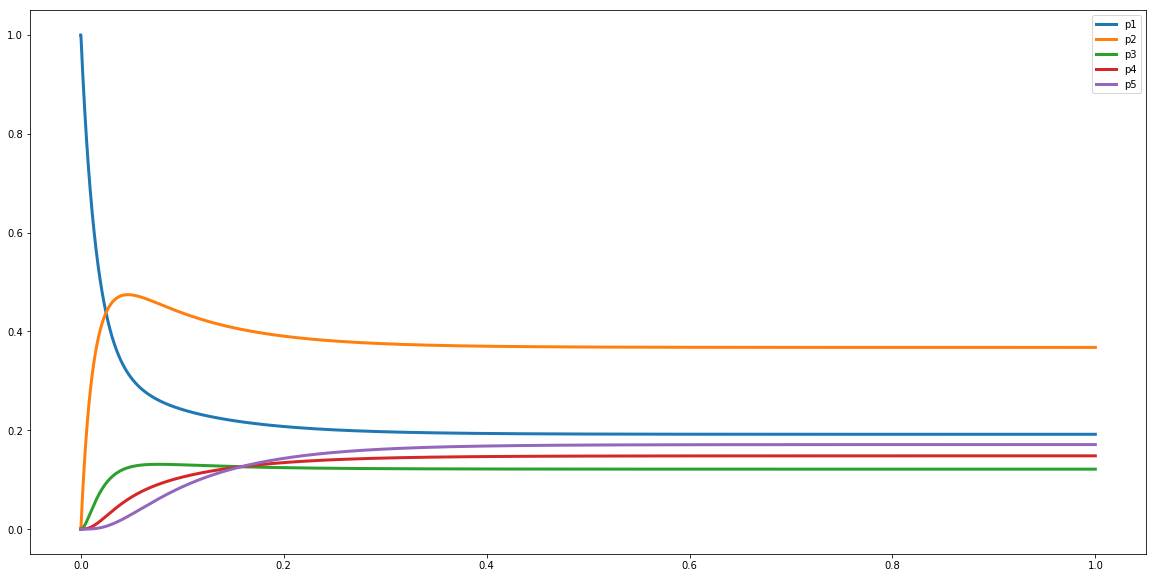

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13776.24it/s]


start [0, 1, 0, 0, 0]
end   [0.1918114527833269, 0.36763794958175605, 0.12128221807467812, 0.14823225471587148, 0.17103612484436842]


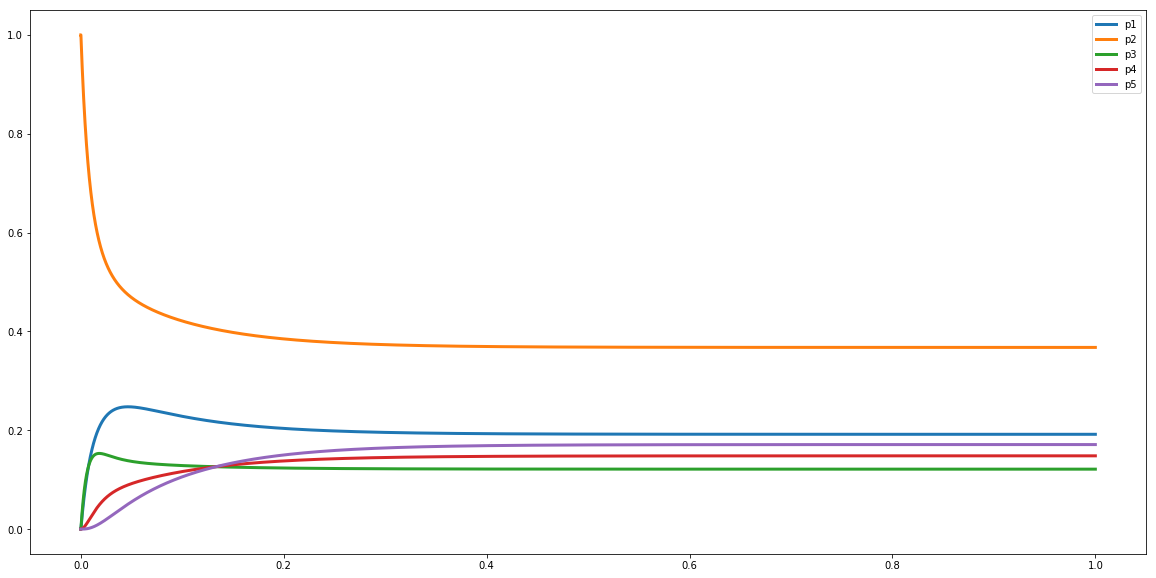

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 12032.43it/s]


start [0, 0, 1, 0, 0]
end   [0.19181060505290384, 0.3676367235388676, 0.12128205496930562, 0.14823299068160187, 0.17103762575732137]


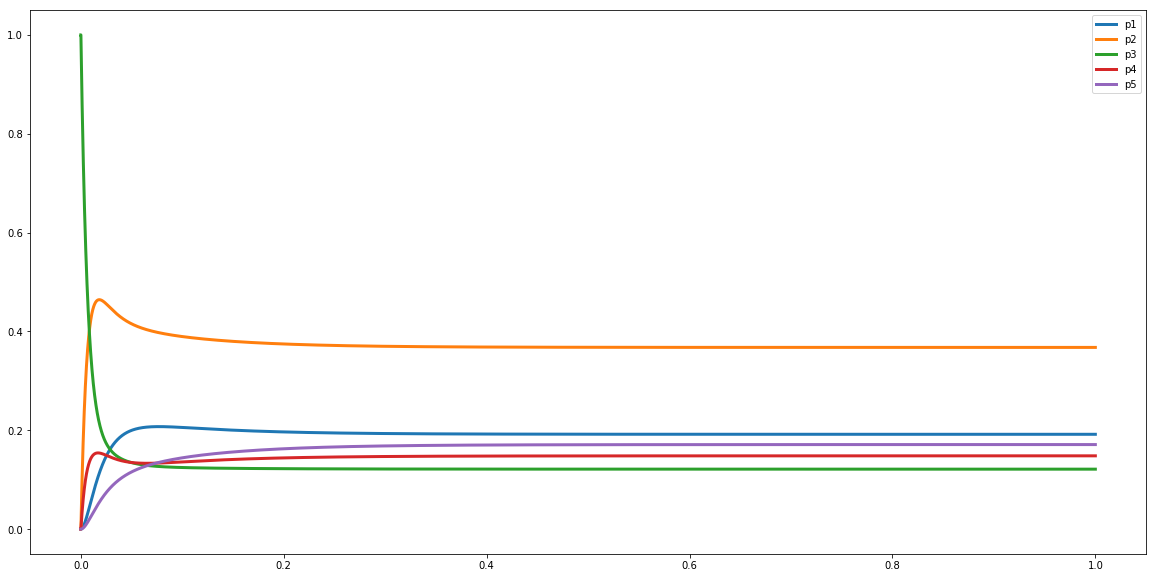

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13721.27it/s]


start [0, 0, 0, 1, 0]
end   [0.19180791725436494, 0.3676328362697611, 0.12128153783040174, 0.14823532412105575, 0.17104238452441692]


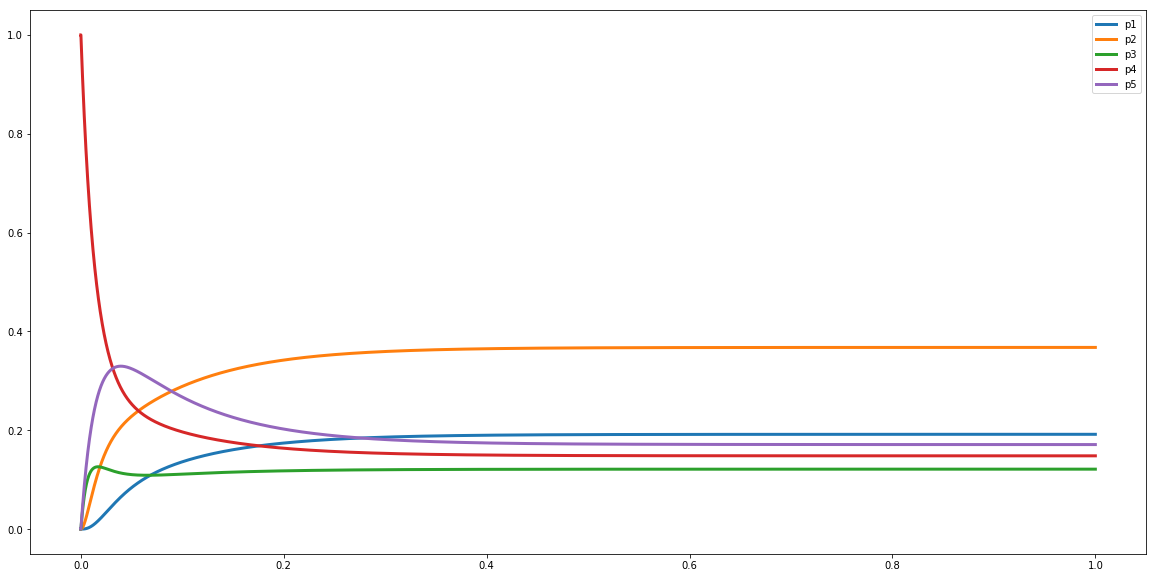

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 13547.82it/s]


start [0, 0, 0, 0, 1]
end   [0.19180629412812902, 0.3676304887990035, 0.12128122553700992, 0.14823673325449463, 0.17104525828136427]


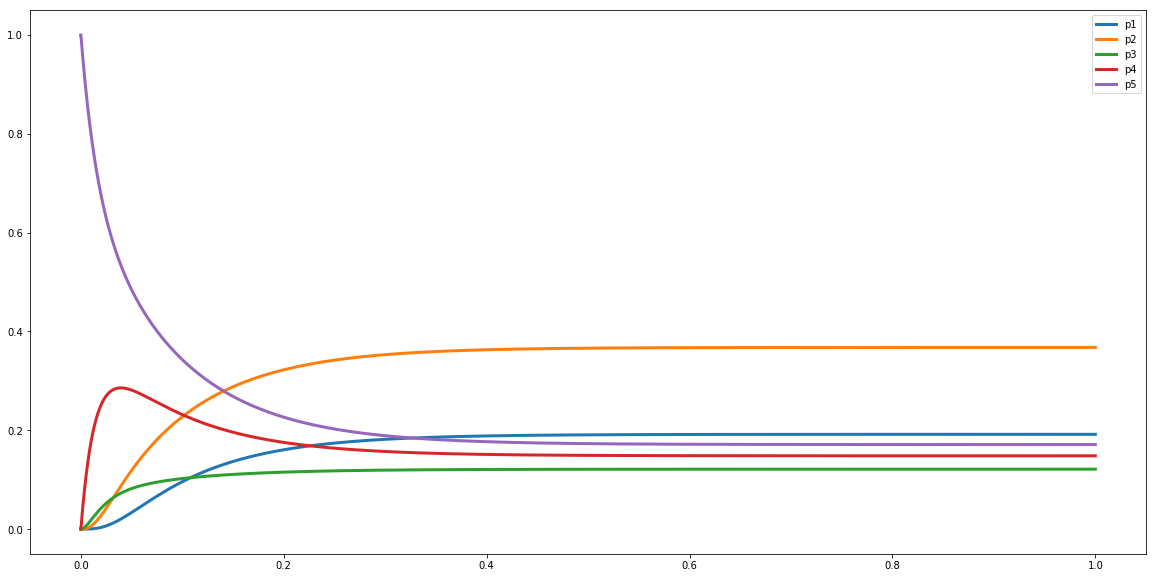

In [9]:
eigenvalues = np.linalg.eig(coefficient_matrix)[0]
eigenvectors = np.linalg.eig(coefficient_matrix)[1]
for i in range(n):
    t1 = []
    p1 = []
    for j in range(n):
        p1.append([0])
    p1[i]=[1]
    c = np.linalg.solve(eigenvectors,[i[0] for i in p1])
    for j in tqdm(np.linspace(0, 1, num=10000)):
        t1.append(j)
        for k in range(n):
            p1[k].append(0)
            for l in range(n):
                p1[k][-1]+=c[l]*eigenvectors[k][l]*np.exp(eigenvalues[l]*j)
                #p1[k][-1]+=c[l]*eigenvectors[l][k]*np.exp(eigenvalues[l]*j)
    print('start',[j[0] for j in p1])
    print('end  ',[j[-1] for j in p1])
    plt.figure(figsize=(20,10))
    for m in range(n):
        plt.plot(t1,p1[m][:-1], linewidth=3)
        plt.legend(['p'+str(i+1) for i in range(n)])
    plt.show()

##  via Simulation 

  0%|                                                                                        | 0/10000 [00:00<?, ?it/s]C:\Users\Lepsky\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()
C:\Users\Lepsky\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in true_divide
  if sys.path[0] == '':
100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 26740.83it/s]


start [1, 0, 0, 0, 0]
end   [0.1433, 0.3458, 0.2749, 0.1542, 0.0819]


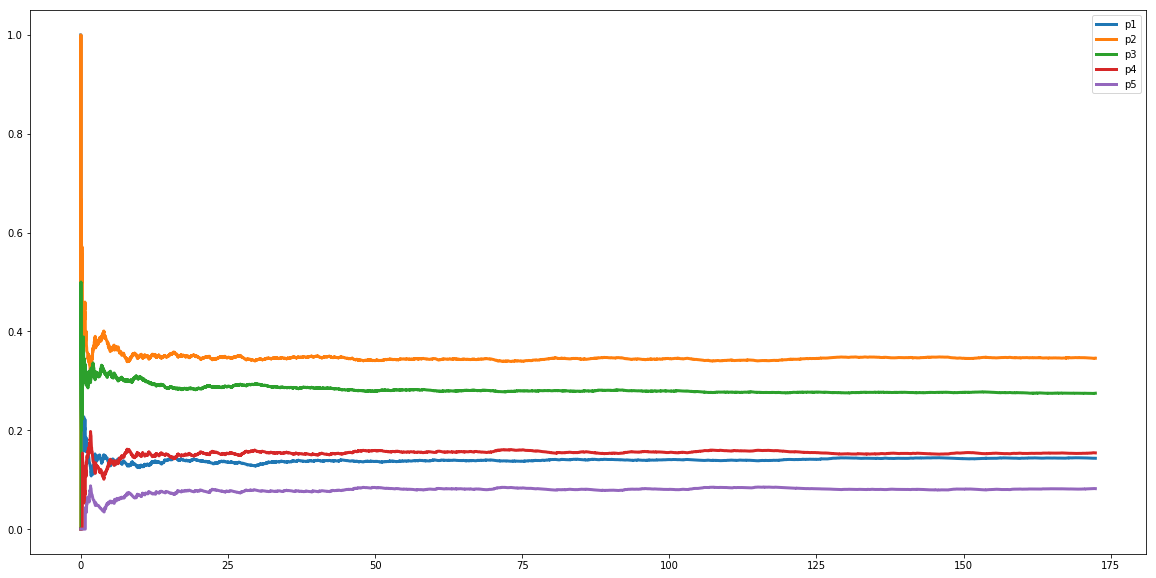

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 24692.29it/s]


start [0, 1, 0, 0, 0]
end   [0.1561, 0.3588, 0.268, 0.1413, 0.0759]


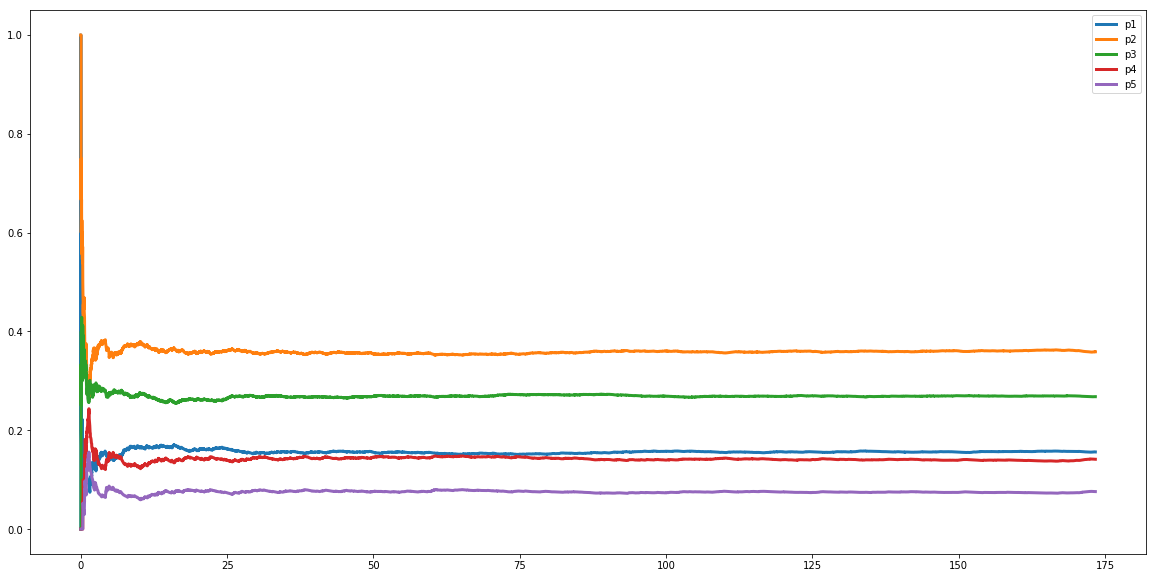

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 26880.40it/s]


start [0, 0, 1, 0, 0]
end   [0.1472, 0.3456, 0.2684, 0.1544, 0.0845]


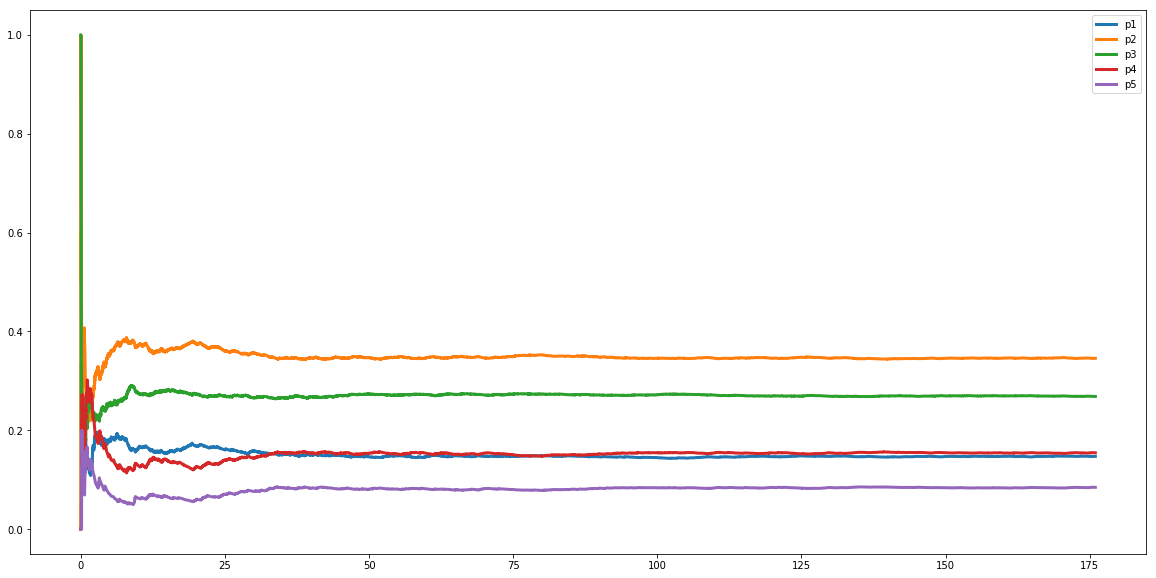

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 21222.05it/s]


start [0, 0, 0, 1, 0]
end   [0.145, 0.3445, 0.272, 0.1556, 0.083]


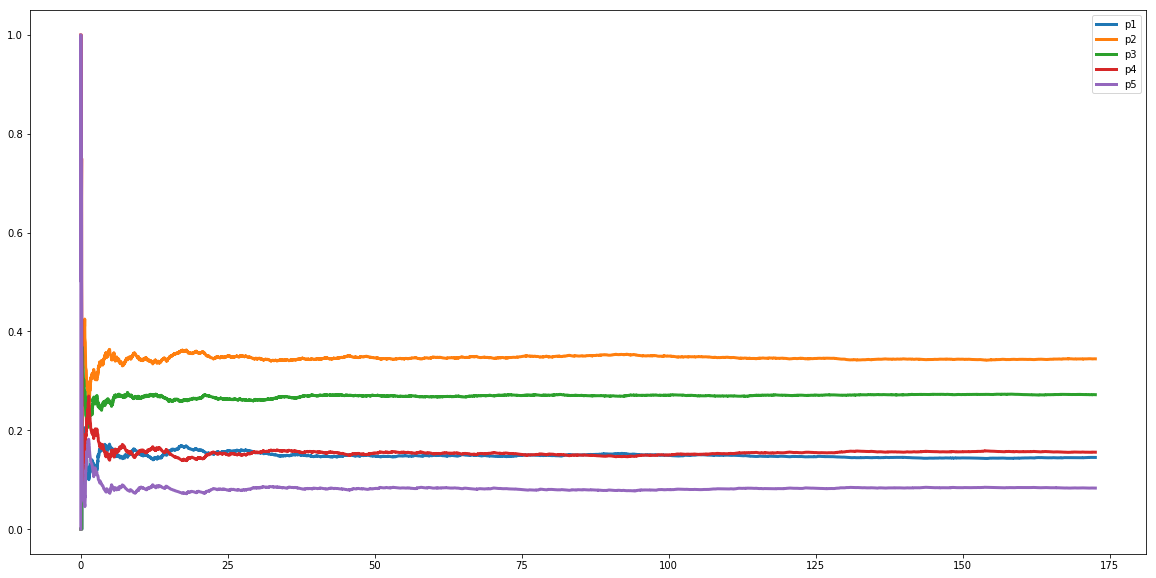

100%|█████████████████████████████████████████████████████████████████████████| 10000/10000 [00:00<00:00, 28170.43it/s]


start [0, 0, 0, 0, 1]
end   [0.1588, 0.3625, 0.2691, 0.1375, 0.0722]


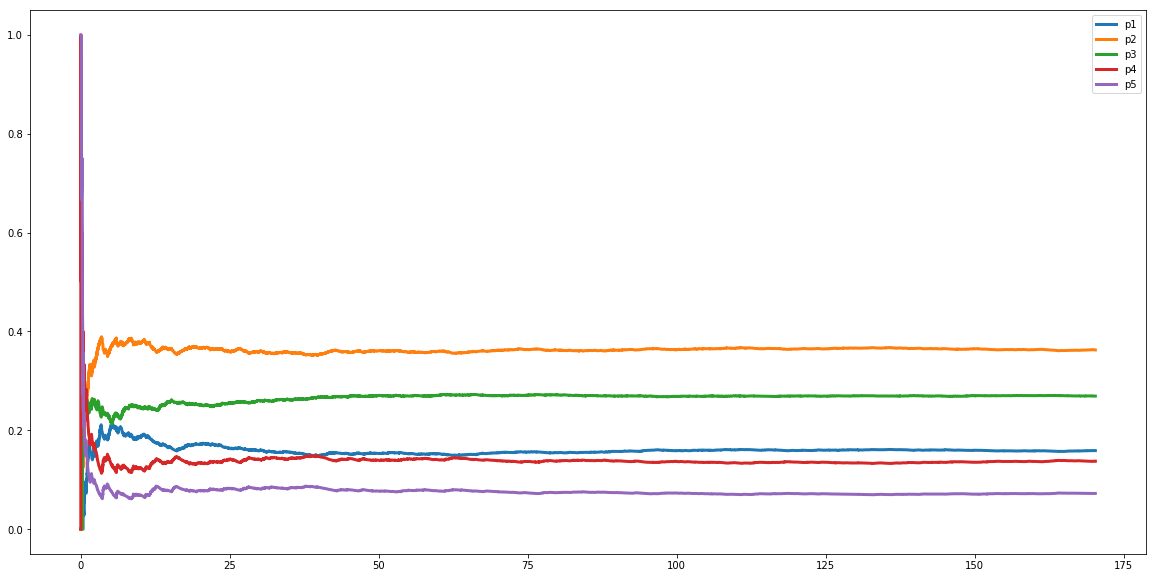

In [10]:
for i in range(n):
    counts = np.zeros(n)
    p2 = []
    t2 = [0]
    for j in range(n):
        p2.append([0])
    counts[i]=1
    position = i
    p2[i] = [1]
    for j in tqdm(range(1,10001)):
        position = np.argmin(np.random.exponential(1/state_matrix[position]))
        t2.append(t2[-1]+np.min(np.random.exponential(1/state_matrix[position])))
        counts[position]+=1
        for k in range(n):
            p2[k].append(counts[k]/j)     
    print('start',[j[0] for j in p2])
    print('end  ',[j[-1] for j in p2]) 
    plt.figure(figsize=(20,10))
    for m in range(n):
        plt.plot(t2,p2[m], linewidth=3)
        plt.legend(['p'+str(i+1) for i in range(n)])
    plt.show()

### Total result

In [11]:
for i in range(n):
    print('p'+str(i+1),round(p[i],5),round(p1[i][-1],5),round(p2[i][-1],5))

p1 0.19181 0.19181 0.1588
p2 0.36764 0.36763 0.3625
p3 0.12128 0.12128 0.2691
p4 0.14823 0.14824 0.1375
p5 0.17104 0.17105 0.0722
